In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np


In [46]:
X = pd.read_csv(r"C:\Users\RITIKA\Downloads\archive\bill_authentication.csv")
print("Variance:", X.columns)
target_column = 'Variance'

features = X.drop(columns=['Variance']) 
y = X[target_column]
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)


Variance: Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')


In [48]:
X.head(5)

Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [50]:
X.shape

(1372, 5)

In [52]:
X_target_column = X.drop(columns=[target_column])

In [54]:
nan_rows = y_train.isnull()
y_train_cleaned = y_train[~nan_rows]
X_train_cleaned = X_train[~nan_rows]
print("Cleaned y_train size:", y_train_cleaned.shape)
print("Cleaned X_train size:", X_train_cleaned.shape)


Cleaned y_train size: (1097,)
Cleaned X_train size: (1097, 4)


Decision Tree Regression
R² Score: 0.8522225240804484
RMSE: 1.0807773211596337


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


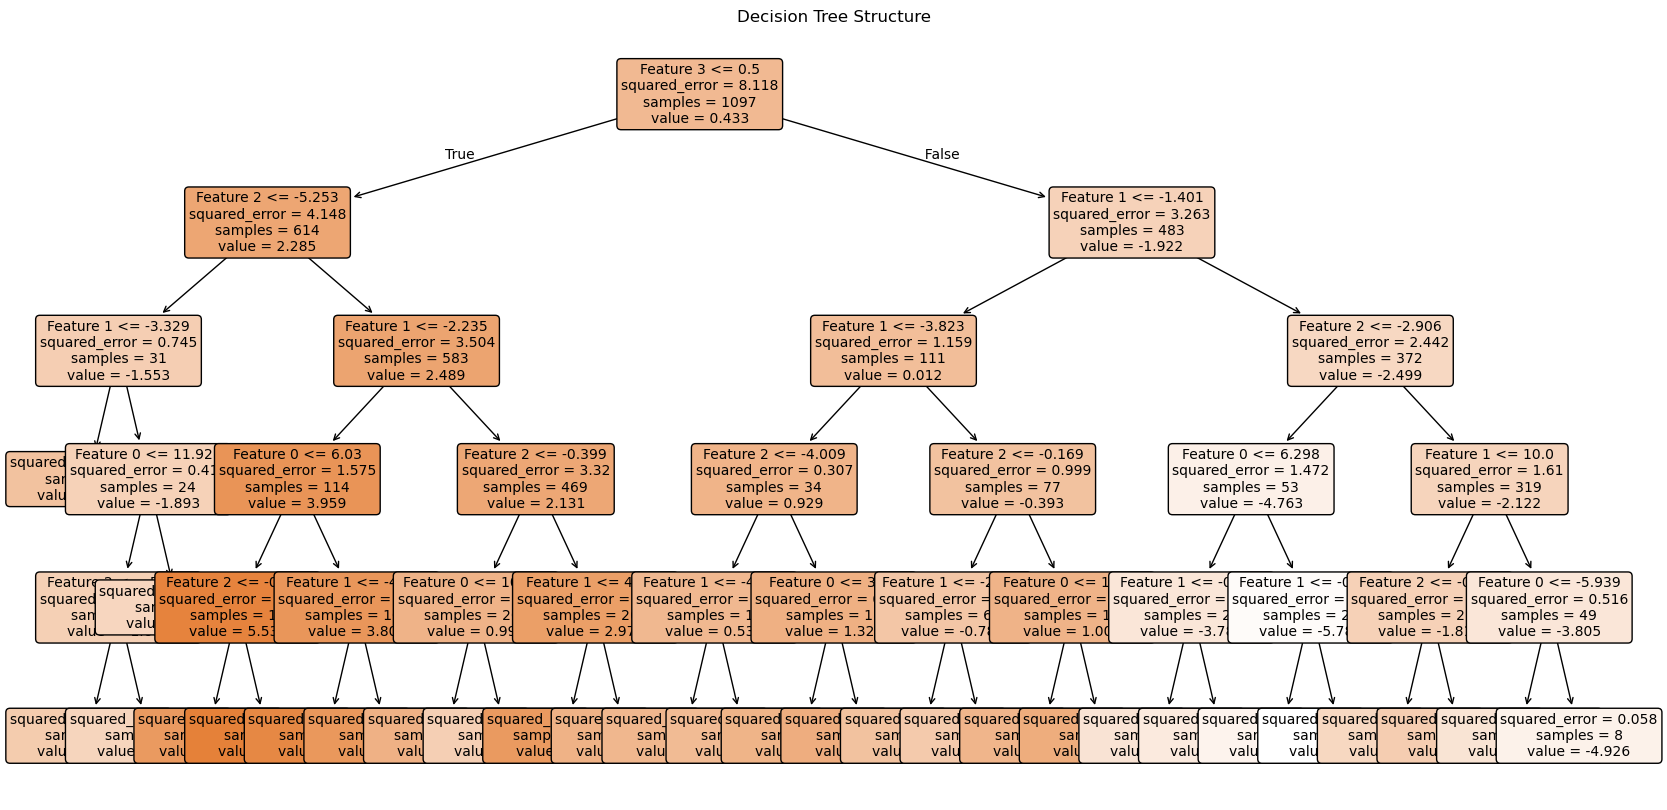

In [78]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['Feature '+str(i) for i in range(X_train.shape[1])],
          class_names=['Class 0', 'Class 1'], rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()


In [82]:
dt = DecisionTreeRegressor(random_state=42)

path = dt.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(ccp_alphas)
print(impurities)

[0.00000000e+00 5.46946212e-13 1.16681745e-12 2.91704649e-10
 5.51504102e-10 6.56335456e-10 1.02552416e-09 2.20601641e-09
 2.20601641e-09 2.64726527e-09 3.57338195e-09 3.93965360e-09
 6.82982726e-09 8.31034640e-09 9.22971741e-09 9.64448496e-09
 1.23245214e-08 1.48085688e-08 1.50171376e-08 1.53327256e-08
 1.86690975e-08 2.11376937e-08 2.23336372e-08 2.63263446e-08
 2.91704649e-08 3.37101185e-08 3.61030082e-08 3.75781222e-08
 3.85779398e-08 3.86618505e-08 3.97609845e-08 4.02734731e-08
 4.02734731e-08 4.20054695e-08 4.74202370e-08 5.12123974e-08
 5.41522334e-08 5.61577028e-08 5.71741112e-08 5.81996354e-08
 5.87158159e-08 6.56335460e-08 6.58525068e-08 6.89562443e-08
 7.35141294e-08 7.35141294e-08 7.82178669e-08 7.96574294e-08
 8.06244303e-08 8.30674567e-08 8.30674567e-08 8.68003646e-08
 8.80628988e-08 8.80628988e-08 9.58295351e-08 9.71558797e-08
 9.84913400e-08 1.03924339e-07 1.05305378e-07 1.07394029e-07
 1.13064038e-07 1.15227894e-07 1.22588879e-07 1.28641750e-07
 1.36412944e-07 1.372025

In [84]:
len(ccp_alphas)

982

In [86]:
ccp_alphas = dt.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

print(f"Total CCP Alphas: {len(ccp_alphas)}")

ccp_alphas_custom = np.linspace(min(ccp_alphas), max(ccp_alphas), 5)
print(f"Reduced CCP Alphas: {len(ccp_alphas_custom)}")


Total CCP Alphas: 982
Reduced CCP Alphas: 5


In [88]:
models = []
for alpha in ccp_alphas_custom:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)

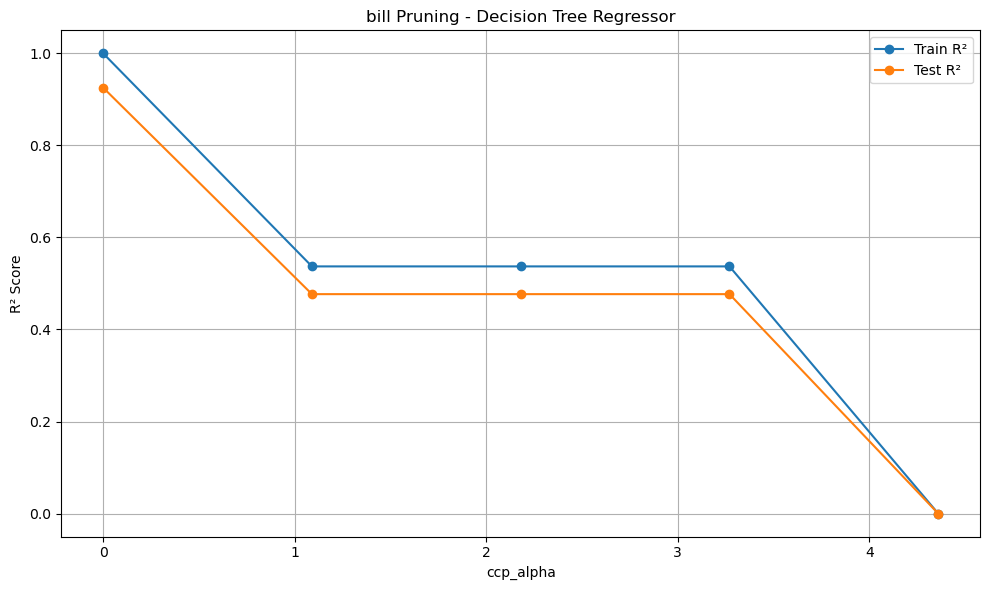

In [93]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_custom, train_scores, label="Train R²", marker='o')
plt.plot(ccp_alphas_custom, test_scores, label="Test R²", marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.title("bill Pruning - Decision Tree Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

y_pred_rf = grid.best_estimator_.predict(X_test)
print("Random Forest Regression")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\RITIKA\anaconda3\Lib\site-pac

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Regression
R² Score: 0.9604831323086853
RMSE: 0.5588861627076822


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\RITIKA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


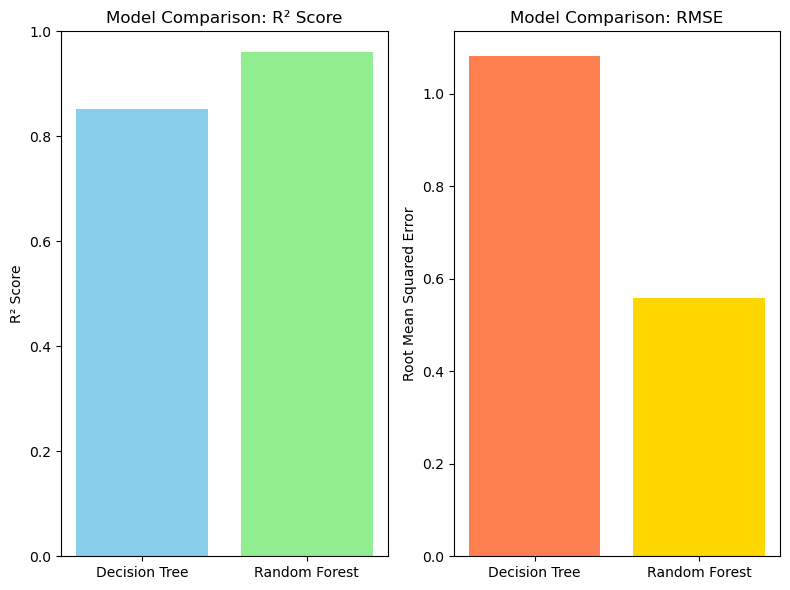

In [106]:
models = ['Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)]
rmse_scores = [mean_squared_error(y_test, y_pred_dt, squared=False),
               mean_squared_error(y_test, y_pred_rf, squared=False)]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen'])
plt.title('Model Comparison: R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(models, rmse_scores, color=['coral', 'gold'])
plt.title('Model Comparison: RMSE')
plt.ylabel('Root Mean Squared Error')

plt.tight_layout()
plt.show()